# Direct Sampling

In [2]:
# import time
# import numpy as np
# from time import sleep

# def model_precheck(model, problem, sample_size=1000, test_runs=10, time_limit=60):
#     """
#     Precheck for model computational time and Sobol analysis feasibility.

#     :param model: The user's model function.
#     :param problem: The problem definition dictionary.
#     :param sample_size: The sample size for Sobol analysis.
#     :param test_runs: Number of runs to test the model's computational time.
#     :param time_limit: Time limit for the test runs (in seconds).
#     :return: Estimated total time for Sobol analysis or a warning if the time limit is exceeded.
#     """

#     # Step 1: Evaluate Computational Time
#     start_time = time.time()
#     for _ in range(test_runs):
#         x = np.random.uniform(low=0, high=1, size=problem['num_vars'])
#         model(x)
#         if (time.time() - start_time) > time_limit:
#             print("Warning: Time limit exceeded during test runs. Exiting precheck.")
#             return -1  # Indicates an early exit due to time limit

#     avg_time_per_run = (time.time() - start_time) / test_runs

#     # Step 2: Estimate Total Time for Sobol Analysis
#     total_evaluations = sample_size * (problem['num_vars'] + 2)  # Saltelli's method
#     estimated_total_time = total_evaluations * avg_time_per_run

#     return estimated_total_time

# # Example usage
# def user_model(x):
#     # User's model function
#     sleep(5)
#     return np.sin(np.sum(x))

# problem = {
#     'num_vars': 20,  # Adjust according to the actual problem
#     'names': [f'x{i+1}' for i in range(20)],
#     'bounds': [[0.0, 1.0] for _ in range(20)]
# }

# # Call the precheck function
# estimated_time = model_precheck(user_model, problem)
# if estimated_time != -1:
#     print(f"Estimated time for Sobol analysis: {estimated_time} seconds")


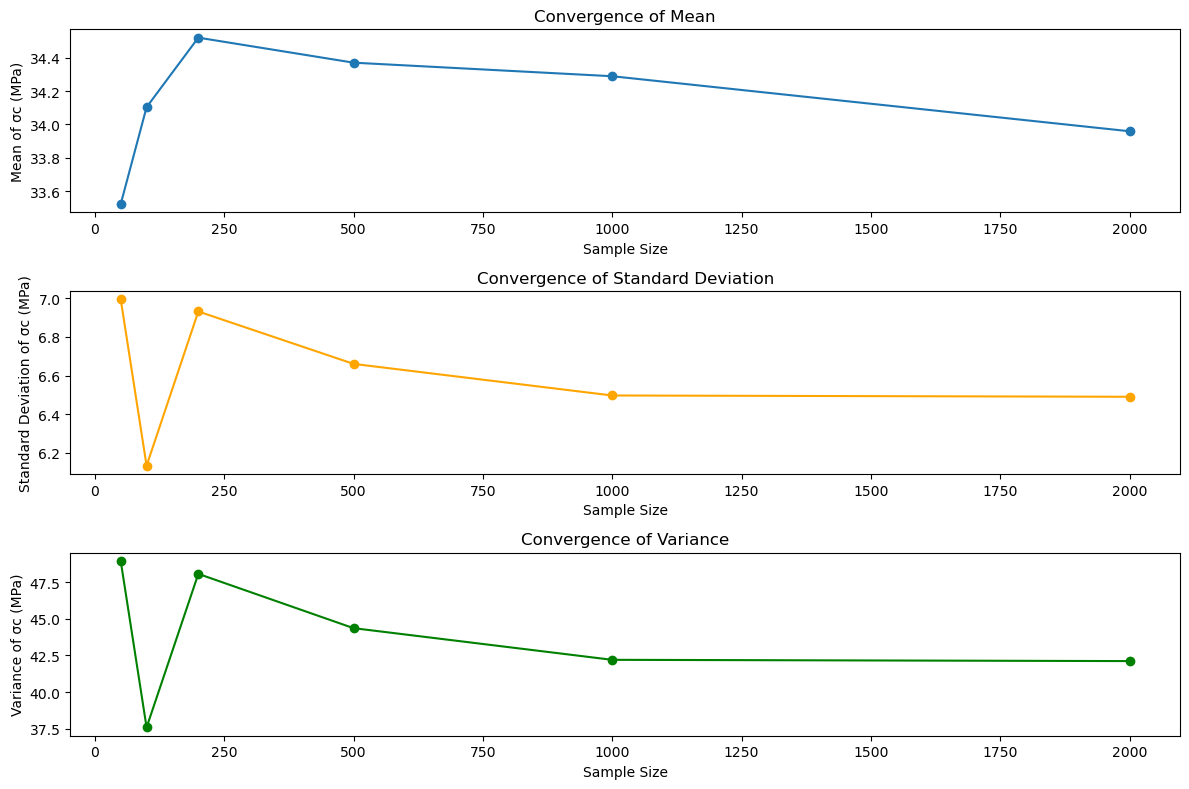

In [6]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################################################################################
def cutting_stress_model(X):
    # Unpacking the input parameters
    gamma, phi, Rs, G, M = X.T
    b = 2.54e-9  # Constant value for b

    # Calculating the cutting stress (alloy strength), σc
    sigma_c_mpa = np.abs(((M * gamma) / (2.0 * b)) * (np.sqrt((8.0 * gamma * phi * Rs) / (np.pi * G * np.power(b, 2))) - phi) / 1e6)
    return sigma_c_mpa

# Defining the problem for the SA
bounds = np.array([[0.15, 0.25],
                   [0.30, 0.45],
                   [1e-8, 3e-8],
                   [6e10, 8e10],
                   [2.9, 3.2]])
################################################################################################################################################


# Generating samples for the convergence study
sample_sizes = [50, 100, 200, 500, 1000, 2000]  # Different sample sizes to test
Y_samples = []

for size in sample_sizes:
    # Generating samples using standard MC sampling
    X = np.random.uniform(bounds[:, 0], bounds[:, 1], (size, bounds.shape[0]))
    Y = cutting_stress_model(X)
    Y_samples.append(Y)

# Preparing to plot the convergence of mean, standard deviation, and variance
means, std_devs, variances = [], [], []
for Y in Y_samples:
    means.append(np.mean(Y))
    std_devs.append(np.std(Y))
    variances.append(np.var(Y))

# Plotting the convergence
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(sample_sizes, means, marker='o')
plt.title('Convergence of Mean')
plt.xlabel('Sample Size')
plt.ylabel('Mean of σc (MPa)')

plt.subplot(3, 1, 2)
plt.plot(sample_sizes, std_devs, marker='o', color='orange')
plt.title('Convergence of Standard Deviation')
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation of σc (MPa)')

plt.subplot(3, 1, 3)
plt.plot(sample_sizes, variances, marker='o', color='green')
plt.title('Convergence of Variance')
plt.xlabel('Sample Size')
plt.ylabel('Variance of σc (MPa)')

plt.tight_layout()
plt.show()


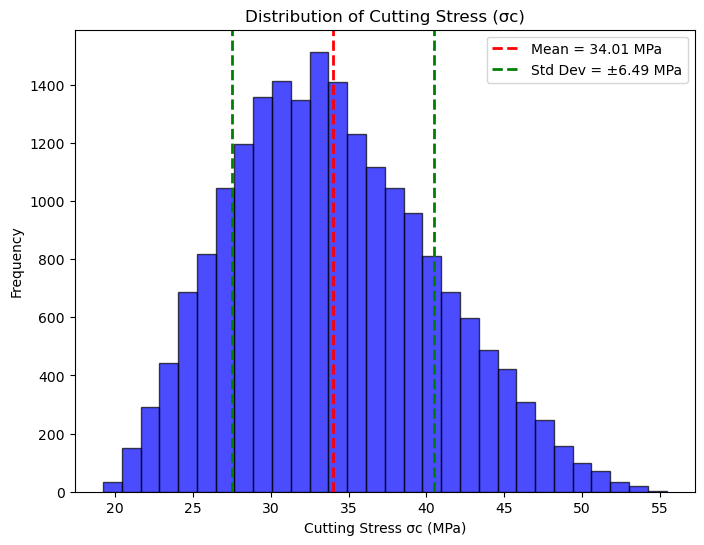

In [10]:
import numpy as np
import matplotlib.pyplot as plt


################################################################################################################################################
# Defining the model function for the cutting stress (alloy strength), σc
def cutting_stress_model(X):
    # Unpacking the input parameters
    gamma, phi, Rs, G, M = X.T
    b = 2.54e-9  # Constant value for b

    # Calculating the cutting stress (alloy strength), σc
    sigma_c_mpa = np.abs(((M * gamma) / (2.0 * b)) * (np.sqrt((8.0 * gamma * phi * Rs) / (np.pi * G * np.power(b, 2))) - phi) / 1e6)
    return sigma_c_mpa

# Problem definition for UQ
bounds = np.array([[0.15, 0.25],
                   [0.30, 0.45],
                   [1e-8, 3e-8],
                   [6e10, 8e10],
                   [2.9, 3.2]])

sample_size = 20000  # Sample size used in UQ analysis
################################################################################################################################################

X_uq = np.random.uniform(bounds[:, 0], bounds[:, 1], (sample_size, bounds.shape[0]))
Y_uq = cutting_stress_model(X_uq)

# Calculating mean, standard deviation, and variance of the output
mean_sigma_c = np.mean(Y_uq)
std_dev_sigma_c = np.std(Y_uq)
variance_sigma_c = np.var(Y_uq)

# Plotting the distribution of σc
plt.figure(figsize=(8, 6))
plt.hist(Y_uq, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(mean_sigma_c, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_sigma_c:.2f} MPa')
plt.axvline(mean_sigma_c - std_dev_sigma_c, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev = ±{std_dev_sigma_c:.2f} MPa')
plt.axvline(mean_sigma_c + std_dev_sigma_c, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Cutting Stress σc (MPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Cutting Stress (σc)')
plt.legend()
plt.show()


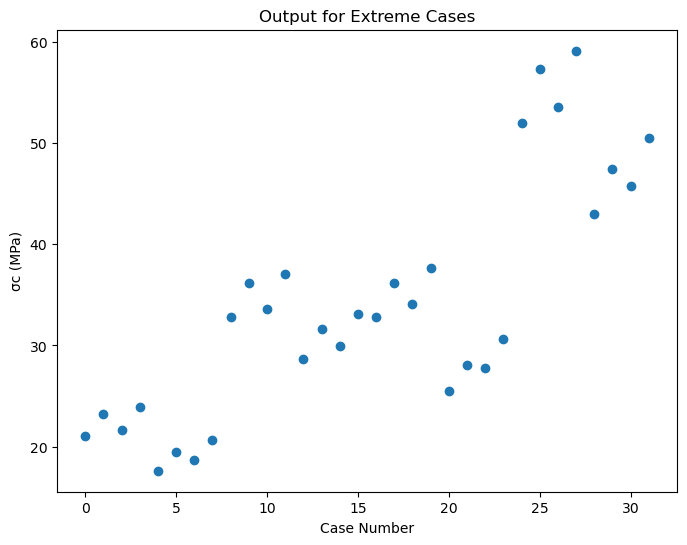

In [23]:
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import product

# # Defining the model function for the cutting stress (alloy strength), σc
# def cutting_stress_model(X):
#     gamma, phi, Rs, G, M = X.T
#     b = 2.54e-9  # Constant value for b
#     sigma_c_mpa = np.abs(((M * gamma) / (2.0 * b)) * 
#                          (np.sqrt((8.0 * gamma * phi * Rs) / 
#                                   (np.pi * G * np.power(b, 2))) - phi) / 1e6)
#     return sigma_c_mpa

# # Defining the bounds for the input parameters
# bounds = np.array([[0.15, 0.25],
#                    [0.30, 0.45],
#                    [1e-8, 3e-8],
#                    [6e10, 8e10],
#                    [2.9, 3.2]])

# # Function to generate all combinations of min and max values for each parameter
# def generate_extreme_cases(bounds):
#     extremes = list(product(*[bounds[i] for i in range(bounds.shape[0])]))
#     return np.array(extremes)

# # Generate extreme cases
# extreme_cases = generate_extreme_cases(bounds)

# # Evaluate the model at each extreme case
# extreme_outputs = cutting_stress_model(extreme_cases)

# # Plotting the results
# plt.figure(figsize=(8, 6))
# plt.plot(range(len(extreme_outputs)), extreme_outputs, 'o')
# plt.title('Output for Extreme Cases')
# plt.xlabel('Case Number')
# plt.ylabel('σc (MPa)')
# plt.show()


In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from SALib.sample import saltelli

# def Ishigami(x, a=7, b=0.1):
#     return np.sin(x[0]) + a * np.sin(x[1])**2 + b * x[2]**4 * np.sin(x[0])

# problem = {
#     'num_vars': 3,
#     'names': ['x1', 'x2', 'x3'],
#     'bounds': [[-3.14159265359, 3.14159265359],
#                [-3.14159265359, 3.14159265359],
#                [-3.14159265359, 3.14159265359]]
# }

# sample_sizes = 2**np.arange(3, 11)
# means = []
# variances = []

# for size in sample_sizes:
#     param_values = saltelli.sample(problem, size)
#     Y = np.array([Ishigami(row) for row in param_values])
#     means.append(np.mean(Y))
#     variances.append(np.var(Y))

# # Plotting
# fig, ax1 = plt.subplots(figsize=(10, 5))

# # Plot mean on primary Y-axis
# ax1.plot(sample_sizes, means, marker='o', color='blue', label='Mean')
# ax1.set_xscale('log')
# ax1.set_xlabel('Sample Size')
# ax1.set_ylabel('Mean of Output', color='blue')

# # Create a secondary Y-axis for variance
# ax2 = ax1.twinx()
# ax2.plot(sample_sizes, variances, marker='o', color='red', label='Variance')
# ax2.set_ylabel('Variance of Output', color='red')

# # Title and legend
# plt.title('Convergence of Mean and Variance')
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# plt.show()


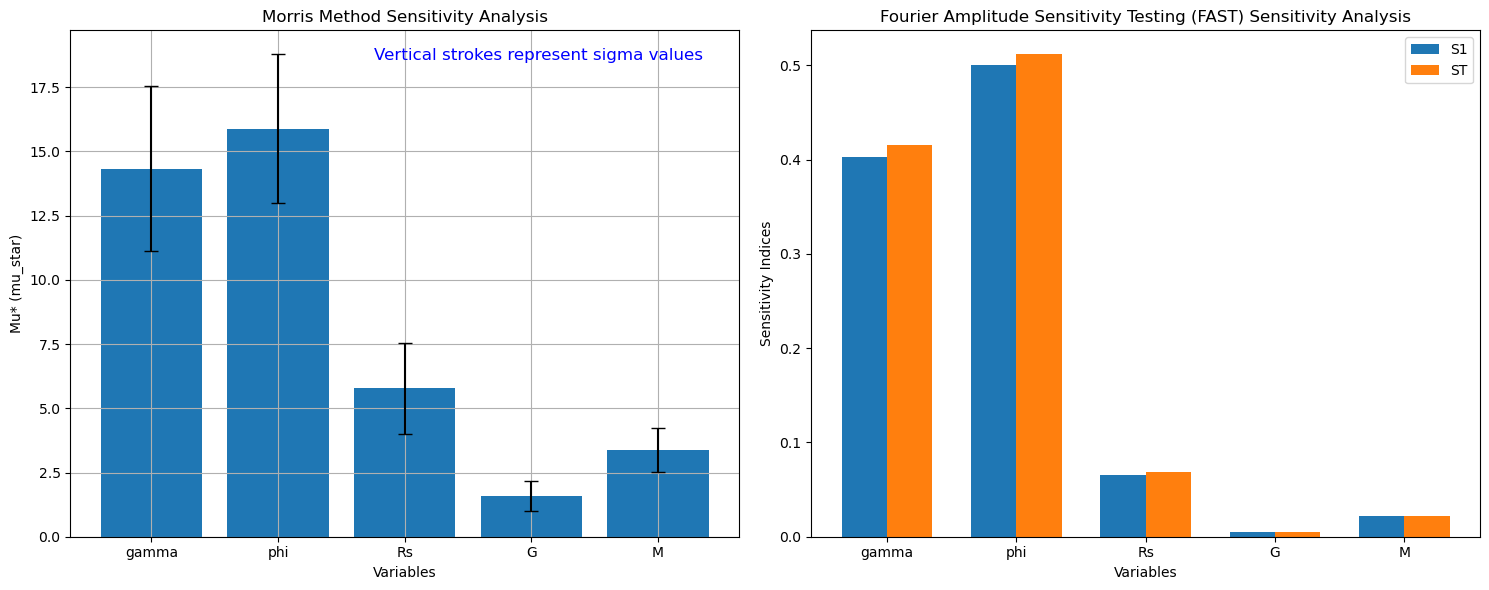

In [13]:
from SALib.analyze import morris
from SALib.sample.morris import sample
from SALib.analyze import fast
from SALib.sample import fast_sampler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


################################################################################################################################################
problem = {
    'num_vars': 5,
    'names': ['gamma', 'phi', 'Rs', 'G', 'M'],
    'bounds': [[0.15, 0.25],  # gamma
               [0.30, 0.45],  # phi
               [1e-8, 3e-8],  # Rs
               [6e10, 8e10],  # G
               [2.9, 3.2]]    # M
}

def calculate_sigmaC(X):
    gamma, phi, Rs, G, M = X.T
    b = 2.54e-9  # constant value for b
    sigmaCMpa = np.abs(((M * gamma) / (2.0 * b)) * 
                       (np.sqrt((8.0 * gamma * phi * Rs) / (np.pi * G * pow(b, 2))) - phi) / 1e6)
    return sigmaCMpa
################################################################################################################################################


param_values = sample(problem, N=1000, num_levels=4, optimal_trajectories=None)
Y = np.array([calculate_sigmaC(sample) for sample in param_values])
Si_morris = morris.analyze(
    problem,
    param_values,
    Y,
    conf_level=0.95,
    print_to_console=False,
    num_levels=4,
    num_resamples=100)

param_values = fast_sampler.sample(problem, 1000, seed=100)
Y = np.array([calculate_sigmaC(sample) for sample in param_values])
Si_fast = fast.analyze(problem, Y, print_to_console=False, seed=100)


morris_data = pd.DataFrame(Si_morris)
fast_data = pd.DataFrame(Si_fast)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# Morris Method Bar Plot with annotation
morris_bar = ax1.bar(morris_data['names'], morris_data['mu_star'], yerr=morris_data['sigma'], capsize=5)
ax1.set_xlabel('Variables')
ax1.set_ylabel('Mu* (mu_star)')
ax1.set_title('Morris Method Sensitivity Analysis')
ax1.grid(True)
ax1.text(0.7, 0.95, 'Vertical strokes represent sigma values', horizontalalignment='center', 
         verticalalignment='center', transform=ax1.transAxes, fontsize=12, color='blue')

# Fast Method Bar Plot
bar_width = 0.35
r1 = range(len(fast_data))
r2 = [x + bar_width for x in r1]
fast_bar1 = ax2.bar(r1, fast_data['S1'], width=bar_width, label='S1')
fast_bar2 = ax2.bar(r2, fast_data['ST'], width=bar_width, label='ST')
ax2.set_xlabel('Variables')
ax2.set_xticks([r + bar_width / 2 for r in range(len(fast_data))])
ax2.set_xticklabels(fast_data['names'])
ax2.set_ylabel('Sensitivity Indices')
ax2.set_title('Fourier Amplitude Sensitivity Testing (FAST) Sensitivity Analysis')
ax2.legend()

plt.tight_layout()
plt.show()

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# from SALib.sample import saltelli
# from SALib.analyze import sobol
# from time import sleep 

# # Define the Ishigami function
# def Ishigami(x, a=7, b=0.1):
#     return np.sin(x[0]) + a * np.sin(x[1])**2 + b * x[2]**4 * np.sin(x[0])

# # Define the problem
# problem = {
#     'num_vars': 3,
#     'names': ['x1', 'x2', 'x3'],
#     'bounds': [[-3.14159265359, 3.14159265359],
#                [-3.14159265359, 3.14159265359],
#                [-3.14159265359, 3.14159265359]]
# }

# # Sample sizes to evaluate (powers of 2)
# sample_sizes = 2**np.arange(3, 11)  # 2^3 to 2^10
# means = []
# variances = []

# # Calculate mean and variance for different sample sizes
# for size in sample_sizes:
#     param_values = saltelli.sample(problem, size)
#     Y = np.array([Ishigami(row) for row in param_values])
#     means.append(np.mean(Y))
#     variances.append(np.var(Y))

# # Plotting
# fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# # Mean and Variance Convergence in one plot
# ax1 = axs[0]
# ax2 = ax1.twinx()

# ax1.plot(sample_sizes, means, marker='o', color='blue', label='Mean')
# ax2.plot(sample_sizes, variances, marker='o', color='red', label='Variance')

# ax1.set_xscale('log')
# ax1.set_xlabel('Sample Size')
# ax1.set_ylabel('Mean of Output', color='blue')
# ax2.set_ylabel('Variance of Output', color='red')
# ax1.set_title('Mean and Variance Convergence')

# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# # Sobol indices bar plot
# Si = sobol.analyze(problem, Y, calc_second_order=True, conf_level=0.95)
# labels = problem['names']
# x = np.arange(len(labels))

# axs[1].bar(x - 0.2, Si['ST'], 0.4, label='ST')
# axs[1].bar(x + 0.2, Si['S1'], 0.4, label='S1')
# axs[1].set_xticks(x)
# axs[1].set_xticklabels(labels)
# axs[1].set_title('First and Total Order Sobol Indices')
# axs[1].set_xlabel('Parameter')
# axs[1].set_ylabel('Sobol Index')
# axs[1].legend()

# plt.tight_layout()
# plt.show()


C:\Users\mlegk\AppData\Local\Temp\ipykernel_7064\526126948.py:33: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, sample_size)


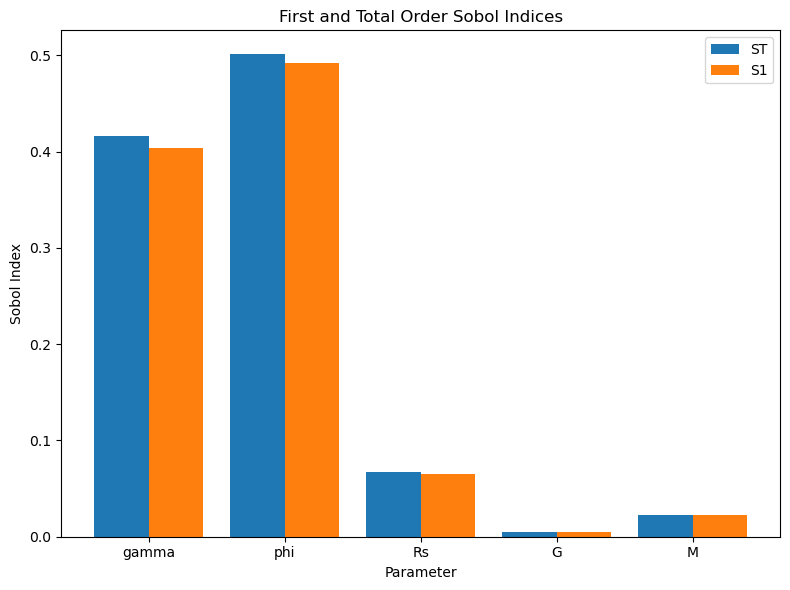

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol

################################################################################################################################################
problem = {
    'num_vars': 5,
    'names': ['gamma', 'phi', 'Rs', 'G', 'M'],
    'bounds': [[0.15, 0.25],  # gamma
               [0.30, 0.45],  # phi
               [1e-8, 3e-8],  # Rs
               [6e10, 8e10],  # G
               [2.9, 3.2]]    # M
}

def calculate_sigmaC(X):
    gamma, phi, Rs, G, M = X.T
    b = 2.54e-9  # constant value for b
    sigmaCMpa = np.abs(((M * gamma) / (2.0 * b)) * 
                       (np.sqrt((8.0 * gamma * phi * Rs) / (np.pi * G * pow(b, 2))) - phi) / 1e6)
    return sigmaCMpa
################################################################################################################################################

# Sample sizes to evaluate (powers of 2)
sample_size = 2**10  # Using a single sample size for simplicity

        # Convergence properties of the Sobol' sequence is only valid if
        # `N` (1000) is equal to `2^n`.


# Generate samples
param_values = saltelli.sample(problem, sample_size)

# Evaluate the Ishigami function
Y = np.array([calculate_sigmaC(row) for row in param_values])

# Perform Sobol analysis
Si = sobol.analyze(problem, Y, calc_second_order=True, conf_level=0.95)

# Plotting the Sobol indices bar chart
fig, ax = plt.subplots(figsize=(8, 6))

labels = problem['names']
x = np.arange(len(labels))

ax.bar(x - 0.2, Si['ST'], 0.4, label='ST')
ax.bar(x + 0.2, Si['S1'], 0.4, label='S1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('First and Total Order Sobol Indices')
ax.set_xlabel('Parameter')
ax.set_ylabel('Sobol Index')
ax.legend()

plt.tight_layout()
plt.show()


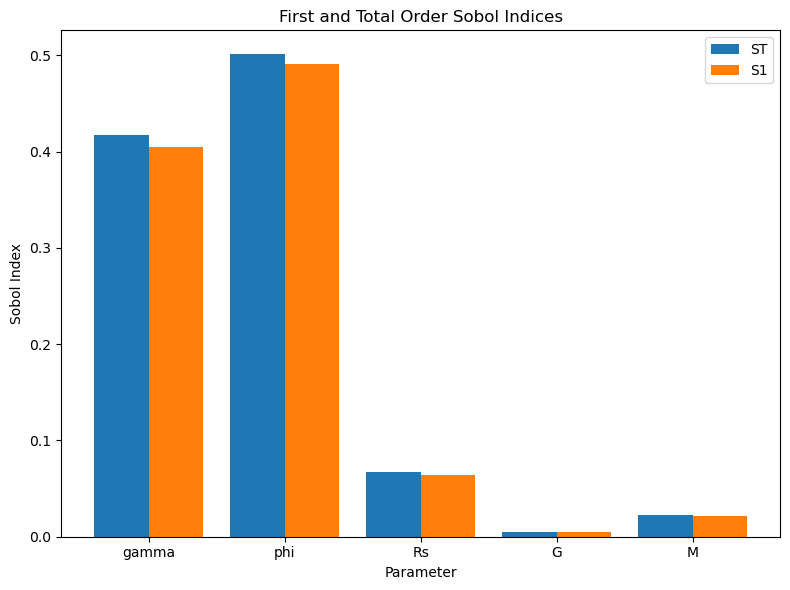

In [16]:
import numpy as np
import chaospy as cp
import matplotlib.pyplot as plt

# Define the problem
problem = {
    'num_vars': 5,
    'names': ['gamma', 'phi', 'Rs', 'G', 'M'],
    'bounds': [[0.15, 0.25],  # gamma
               [0.30, 0.45],  # phi
               [1e-8, 3e-8],  # Rs
               [6e10, 8e10],  # G
               [2.9, 3.2]]    # M
}

# Define the calculate_sigmaC function
def calculate_sigmaC(X):
    gamma, phi, Rs, G, M = X.T
    b = 2.54e-9  # constant value for b
    sigmaCMpa = np.abs(((M * gamma) / (2.0 * b)) * 
                       (np.sqrt((8.0 * gamma * phi * Rs) / (np.pi * G * pow(b, 2))) - phi) / 1e6)
    return sigmaCMpa

# Creating the distribution
distr_overall = cp.J(*[cp.Uniform(*bound) for bound in problem['bounds']])

# Polynomial chaos expansion
K = 3
N = K
poly = cp.expansion.stieltjes(N, distr_overall, normed=True)
nodes, weights = cp.generate_quadrature(K, distr_overall, rule="G")

# Evaluate the model at the quadrature points
df = calculate_sigmaC(np.array(nodes).T)

# Fit the polynomial chaos expansion
pc_approx, coeff = cp.fit_quadrature(poly, nodes, weights, df, retall=True)

# Calculate Sobol indices
total_Sobol_ind = cp.Sens_t(pc_approx, distr_overall)
first_order_Sobol_ind = cp.Sens_m(pc_approx, distr_overall)

# Plotting the Sobol indices bar chart
fig, ax = plt.subplots(figsize=(8, 6))

labels = problem['names']
x = np.arange(len(labels))

ax.bar(x - 0.2, total_Sobol_ind, 0.4, label='ST')
ax.bar(x + 0.2, first_order_Sobol_ind, 0.4, label='S1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('First and Total Order Sobol Indices')
ax.set_xlabel('Parameter')
ax.set_ylabel('Sobol Index')
ax.legend()

plt.tight_layout()
plt.show()


In [18]:
!pip3 install emukit

  Using cached emukit-0.4.10-py3-none-any.whl
  Using cached GPy-1.10.0.tar.gz (959 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached emcee-3.1.4-py2.py3-none-any.whl (46 kB)
  Using cached paramz-0.9.5-py3-none-any.whl
  Obtaining dependency information for cython>=0.29 from https://files.pythonhosted.org/packages/60/d0/30f3ecd4dcafa87cd024a2687a6be7aa14f94d75c040192f8f8629ef8ad8/Cython-3.0.7-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.7-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached Cython-3.0.7-cp311-cp311-win_amd64.whl (2.8 MB)
  Running setup.py clean for GPy
Failed to build GPy


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [513 lines of output]
      C:\Users\mlegk\anaconda3\Lib\site-packages\setuptools\dist.py:745: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'upload-dir' will not be supported in future
              versions. Please use the underscore name 'upload_dir' instead.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ********************************************************************************
      
      !!
        opt = self.warn_dash_deprecation(opt, section)
      C:\Users\mlegk

In [ ]:
import numpy as np
from emukit.core.initial_designs import RandomDesign
from emukit.core import ContinuousParameter, ParameterSpace
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity

# Define the calculate_sigmaC function
def calculate_sigmaC(X):
    gamma, phi, Rs, G, M = X.T
    b = 2.54e-9  # constant value for b
    sigmaCMpa = np.abs(((M * gamma) / (2.0 * b)) * 
                       (np.sqrt((8.0 * gamma * phi * Rs) / (np.pi * G * pow(b, 2))) - phi) / 1e6)
    return sigmaCMpa

# Define the problem space
problem = {
    'num_vars': 5,
    'names': ['gamma', 'phi', 'Rs', 'G', 'M'],
    'bounds': [[0.15, 0.25],  # gamma
               [0.30, 0.45],  # phi
               [1e-8, 3e-8],  # Rs
               [6e10, 8e10],  # G
               [2.9, 3.2]]    # M
}

# Creating the parameter space for the emulator
space = ParameterSpace([ContinuousParameter(name, *bounds) for name, bounds in zip(problem['names'], problem['bounds'])])

# Generate samples
design = RandomDesign(space)
x = design.get_samples(500)
y = calculate_sigmaC(x)[:, np.newaxis]

# Fit a Gaussian Process model
model_gpy = GPRegression(x, y)
model_emukit = GPyModelWrapper(model_gpy)
model_emukit.optimize()

# Compute the Sobol indices using Monte Carlo Sensitivity analysis
num_mc = 10000
sensitivity_gpbased = MonteCarloSensitivity(model=model_emukit, input_domain=space)
main_effects_gp, total_effects_gp, _ = sensitivity_gpbased.compute_effects(num_monte_carlo_points=num_mc)

# Print the results
print("Main Effects (GP):", main_effects_gp)
print("Total Effects (GP):", total_effects_gp)
